# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [64]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


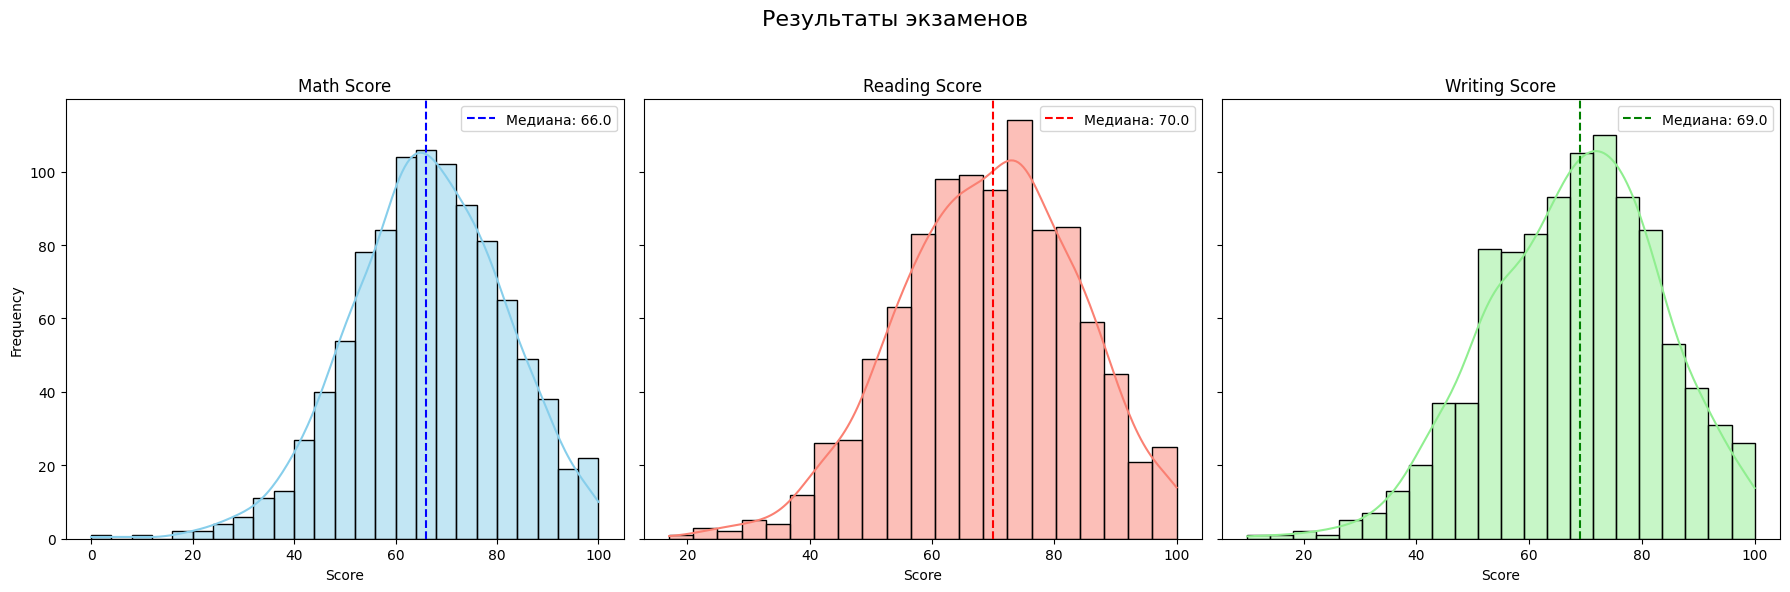

Медианное значение по математике: 66.0
Медианное значение по чтению: 70.0
Медианное значение по письму: 69.0


In [65]:
# Медианы для каждого предмета
math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

# Группировка графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Заголовок
fig.suptitle("Результаты экзаменов", fontsize=16)

# Гистограмма для 'math score'
sns.histplot(df['math score'], kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(math_median, color='blue', linestyle='--', label=f'Медиана: {math_median}')
axes[0].set_title("Math Score")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Гистограмма для 'reading score'
sns.histplot(df['reading score'], kde=True, ax=axes[1], color='salmon')
axes[1].axvline(reading_median, color='red', linestyle='--', label=f'Медиана: {reading_median}')
axes[1].set_title("Reading Score")
axes[1].set_xlabel("Score")
axes[1].legend()

# Гистограмма для 'writing score'
sns.histplot(df['writing score'], kde=True, ax=axes[2], color='lightgreen')
axes[2].axvline(writing_median, color='green', linestyle='--', label=f'Медиана: {writing_median}')
axes[2].set_title("Writing Score")
axes[2].set_xlabel("Score")
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Выводим медианные значения
print(f"Медианное значение по математике: {math_median}")
print(f"Медианное значение по чтению: {reading_median}")
print(f"Медианное значение по письму: {writing_median}")

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

C:\Users\Simon\AppData\Local\Temp\ipykernel_18912\2389352571.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='parental level of education', data=df, order=education_counts.index, palette='viridis')


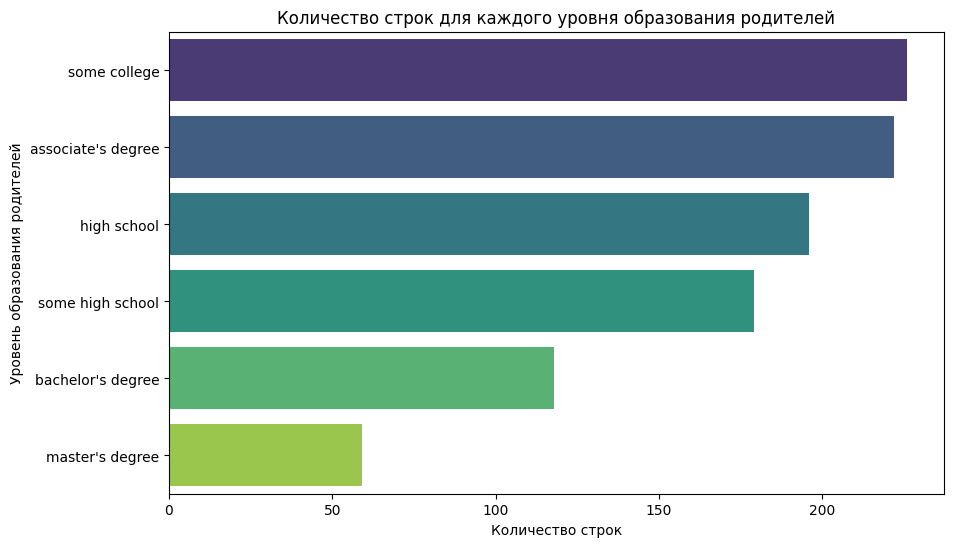

In [66]:
# Уровни образования - количество строк
education_counts = df['parental level of education'].value_counts()
display(education_counts)

# График распределения уровней образования родителей
plt.figure(figsize=(10, 6))
sns.countplot(y='parental level of education', data=df, order=education_counts.index, palette='viridis')
plt.title("Количество строк для каждого уровня образования родителей")
plt.xlabel("Количество строк")
plt.ylabel("Уровень образования родителей")
plt.show()

C:\Users\Simon\AppData\Local\Temp\ipykernel_18912\151835343.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='parental level of education', y='math score', data=df, palette='viridis', order=education_counts.index, ci='sd', markers="o", linestyles="--")
C:\Users\Simon\AppData\Local\Temp\ipykernel_18912\151835343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='parental level of education', y='math score', data=df, palette='viridis', order=education_counts.index, ci='sd', markers="o", linestyles="--")


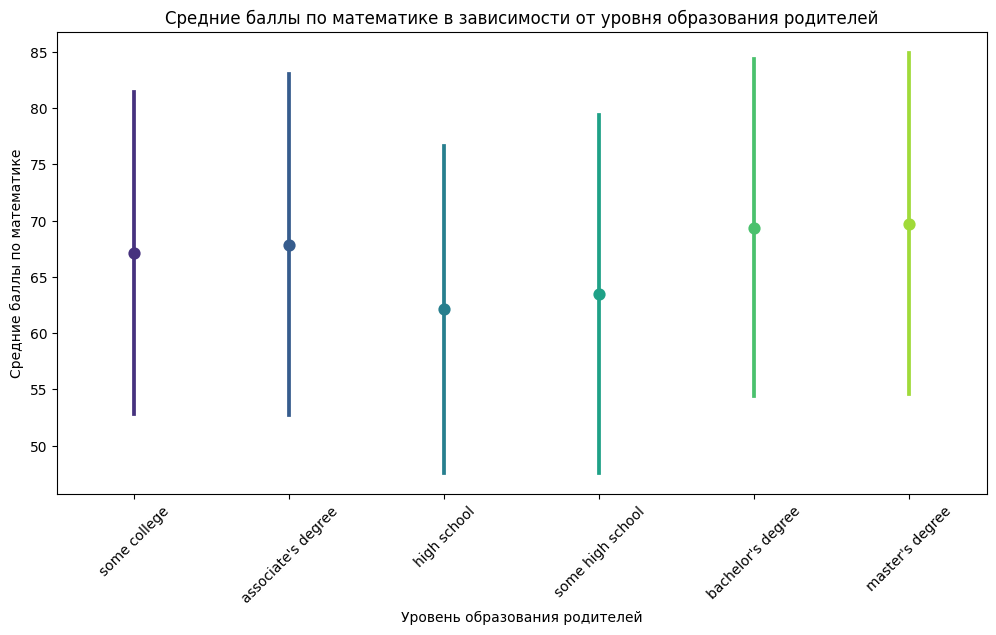

In [67]:
# График средних баллов по математике для каждого уровня образования родителей
plt.figure(figsize=(12, 6))
sns.pointplot(x='parental level of education', y='math score', data=df, palette='viridis', order=education_counts.index, ci='sd', markers="o", linestyles="--")
plt.title("Средние баллы по математике в зависимости от уровня образования родителей")
plt.xlabel("Уровень образования родителей")
plt.ylabel("Средние баллы по математике")
plt.xticks(rotation=45)
plt.show()

Ответ: Да, отличаются. Забавно, что оконченное школьное образование у родителей имеет меньший результат, чем у тех, кто её не окончил

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [68]:
high_score_female_count = df[(df['gender'] == 'female') & 
                             (df[['math score', 'reading score', 'writing score']].min(axis=1) > 90)].shape[0]

print("Число студенток, набравших больше 90 баллов по всем предметам:", high_score_female_count)

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [69]:
score_stats = df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])

display(score_stats)

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [70]:
score_impact = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg('mean')

display(score_impact)

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

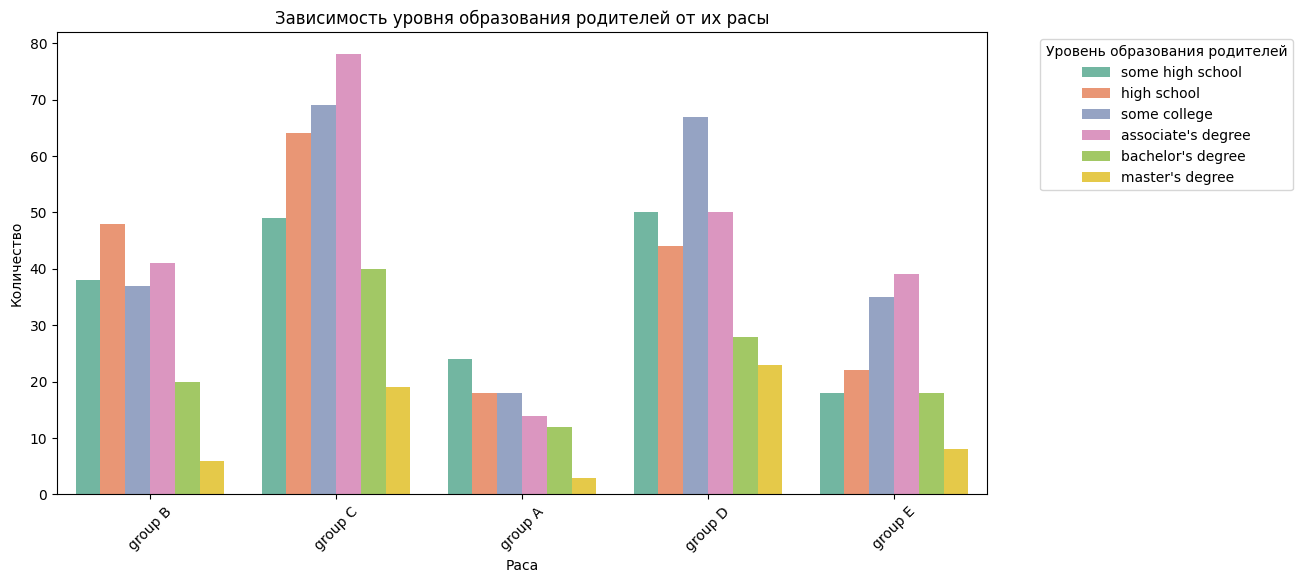

In [71]:
education_order = [
    "some high school", 
    "high school", 
    "some college", 
    "associate's degree", 
    "bachelor's degree", 
    "master's degree"
]

# Преобразуем столбец 'parental level of education' в категориальный тип с заданным порядком
df['parental level of education'] = pd.Categorical(df['parental level of education'], categories=education_order, ordered=True)

# Построение графика с новым порядком уровней образования
plt.figure(figsize=(12, 6))
sns.countplot(x='race/ethnicity', hue='parental level of education', data=df, palette='Set2')
plt.title("Зависимость уровня образования родителей от их расы")
plt.xlabel("Раса")
plt.ylabel("Количество")
plt.legend(title='Уровень образования родителей', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

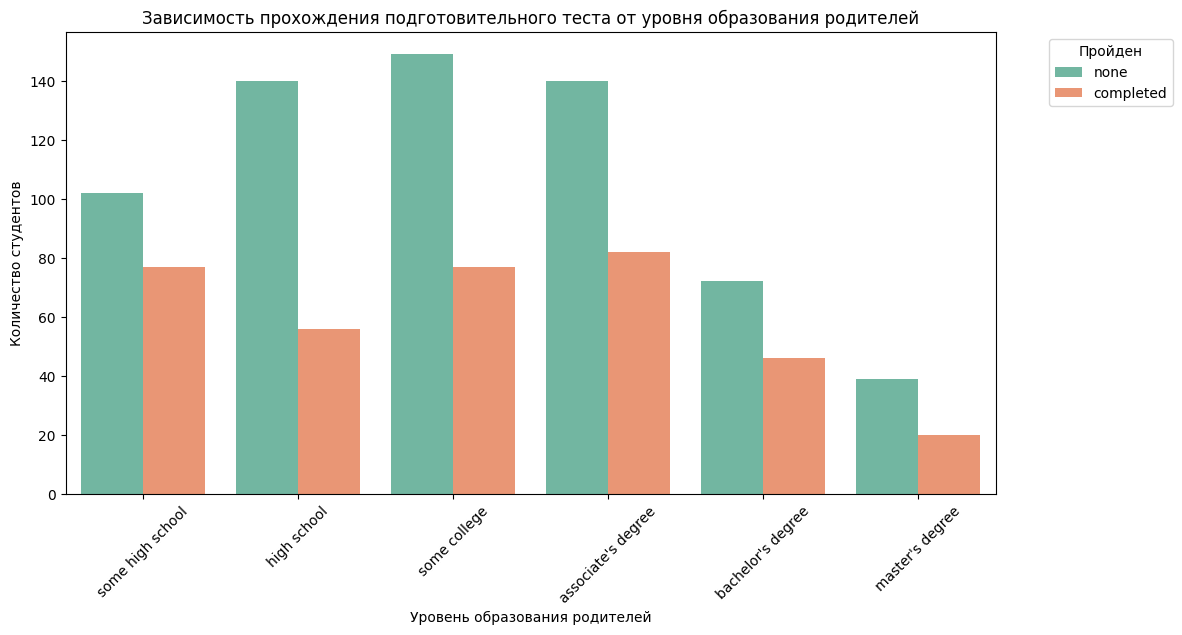

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x='parental level of education', hue='test preparation course', data=df, palette='Set2')
plt.title("Зависимость прохождения подготовительного теста от уровня образования родителей")
plt.xlabel("Уровень образования родителей")
plt.ylabel("Количество студентов")
plt.legend(title='Пройден', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

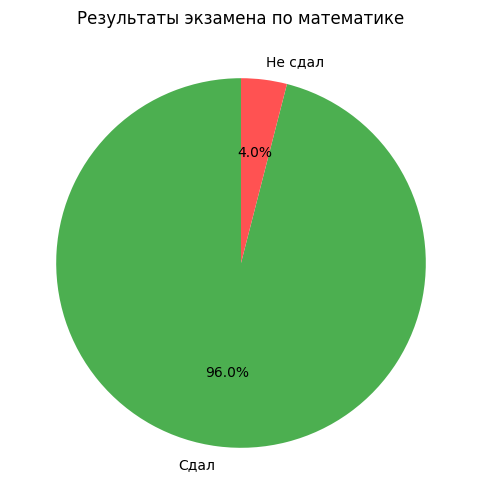

In [73]:
df['math_result'] = df['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')

# Количество сдавших и не сдавших
result_counts = df['math_result'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
result_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5252'])
plt.title("Результаты экзамена по математике")
plt.ylabel("")
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

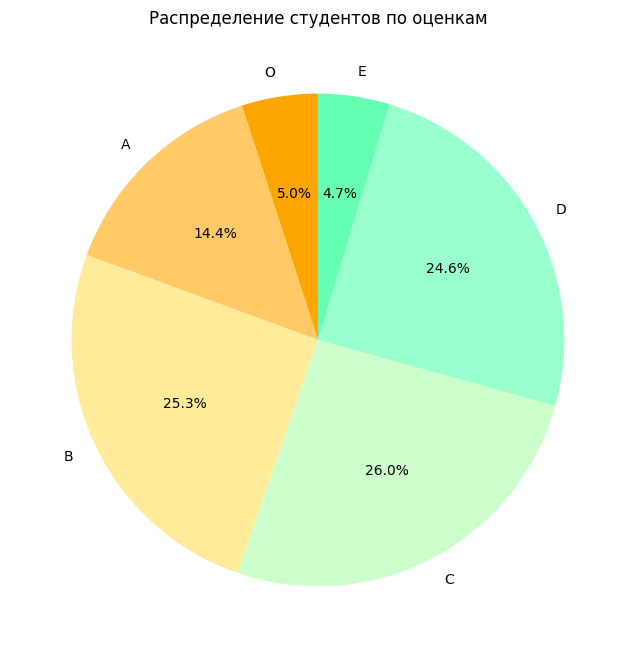

In [74]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Функция для присвоения оценки в зависимости от среднего балла и балла по математике
def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    else:
        return ("E", "E", "E", "E", "D", "D", "C", "B", "A", "O")[int((row['average_score'] - 0.0001) // 10)]


# Применяем функцию для присвоения оценки каждому студенту
df['grade'] = df.apply(assign_grade, axis=1)

# Подсчитываем количество студентов для каждой оценки
grade_counts = df['grade'].value_counts().reindex(['E', 'D', 'C', 'B', 'A', 'O'][::-1])

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FFA500', '#FFC966', '#FFEB99', '#CCFFCC', '#99FFCC', '#66FFB2'])
plt.title("Распределение студентов по оценкам")
plt.ylabel("")
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

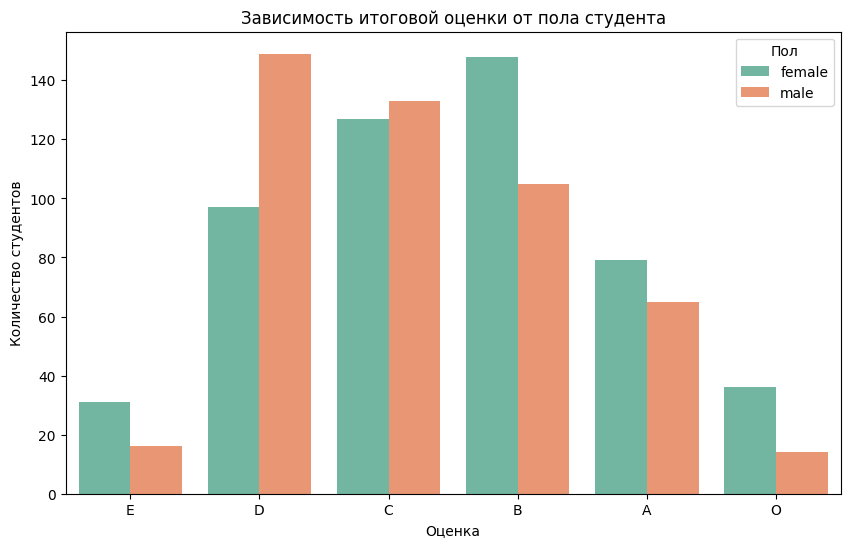

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=df, order=['E', 'D', 'C', 'B', 'A', 'O'], palette='Set2')
plt.title("Зависимость итоговой оценки от пола студента")
plt.xlabel("Оценка")
plt.ylabel("Количество студентов")
plt.legend(title='Пол')
plt.show()

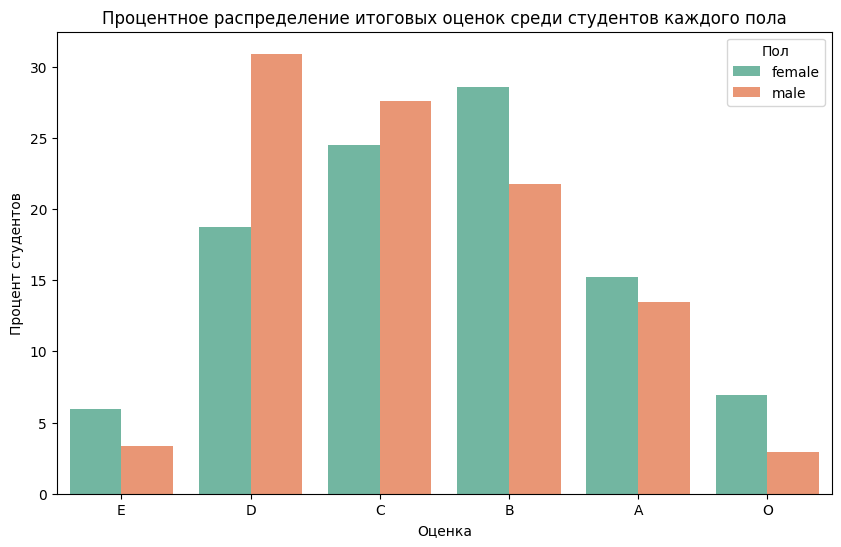

In [76]:
grade_gender_counts = df.groupby(['gender', 'grade']).size().unstack().fillna(0)
grade_gender_percentage = grade_gender_counts.div(grade_gender_counts.sum(axis=1), axis=0) * 100

# Преобразуем данные для построения графика
grade_gender_percentage = grade_gender_percentage.stack().reset_index()
grade_gender_percentage.columns = ['gender', 'grade', 'percentage']

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='percentage', hue='gender', data=grade_gender_percentage, order=['E', 'D', 'C', 'B', 'A', 'O'], palette='Set2')
plt.title("Процентное распределение итоговых оценок среди студентов каждого пола")
plt.xlabel("Оценка")
plt.ylabel("Процент студентов")
plt.legend(title='Пол')
plt.show()

Это график с процентным соотношением (видимо, в датасете примерно равное соотношение полов, поэтому визуально графики очень схожи)